In [3]:
# Using the MPG data set to produce the following: 

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [5]:
df = pd.read_csv("data/mpg.csv")

In [6]:
df.head(2)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact


In [7]:
class_list = df['class'].tolist()

In [8]:
# Use the MPG data set to realize a scatter plot of cty/hwy vs displacement
    # Do not code the classes of vehicle
    # Map each class to a different shape/symbol
    # Map each class to a different color
    # Map each class to a different color or brightness and shape/symbol
    # Map each class to a brightness determined by mean displacement for the class
    # Map each class to a shape whose size is determined by mean displacement for the class

In [9]:
markers = ['v','o','>','^','<','.','s']

# deprecated 
#size = [x*3*int(round(df.cty.mean())) for x in range(1,8)]

In [10]:
size_dict = {name: group["displ"].mean() * 51 for name, group in df.groupby('class')}
size = df.apply(lambda x: size_dict[x['class']], 1)

In [11]:
df.head(2).apply(lambda row: print(row['cty']), 1)

18
21


0    None
1    None
dtype: object

In [12]:
from sklearn.preprocessing import normalize

alpha_dict = {name: group["displ"].mean() for name, group in df.groupby('class')}
alpha = df.apply(lambda x: alpha_dict[x['class']], 1)

In [13]:
alpha

0      2.325532
1      2.325532
2      2.325532
3      2.325532
4      2.325532
5      2.325532
6      2.325532
7      2.325532
8      2.325532
9      2.325532
10     2.325532
11     2.325532
12     2.325532
13     2.325532
14     2.325532
15     2.921951
16     2.921951
17     2.921951
18     4.456452
19     4.456452
20     4.456452
21     4.456452
22     4.456452
23     6.160000
24     6.160000
25     6.160000
26     6.160000
27     6.160000
28     4.456452
29     4.456452
         ...   
204    4.418182
205    4.418182
206    4.418182
207    2.325532
208    2.325532
209    2.325532
210    2.325532
211    2.325532
212    2.325532
213    2.325532
214    2.325532
215    2.325532
216    2.325532
217    2.325532
218    2.325532
219    2.325532
220    2.325532
221    2.660000
222    2.660000
223    2.660000
224    2.660000
225    2.660000
226    2.660000
227    2.921951
228    2.921951
229    2.921951
230    2.921951
231    2.921951
232    2.921951
233    2.921951
Length: 234, dtype: floa

In [14]:
alpha_ = np.linspace(0.1, 1, 7)

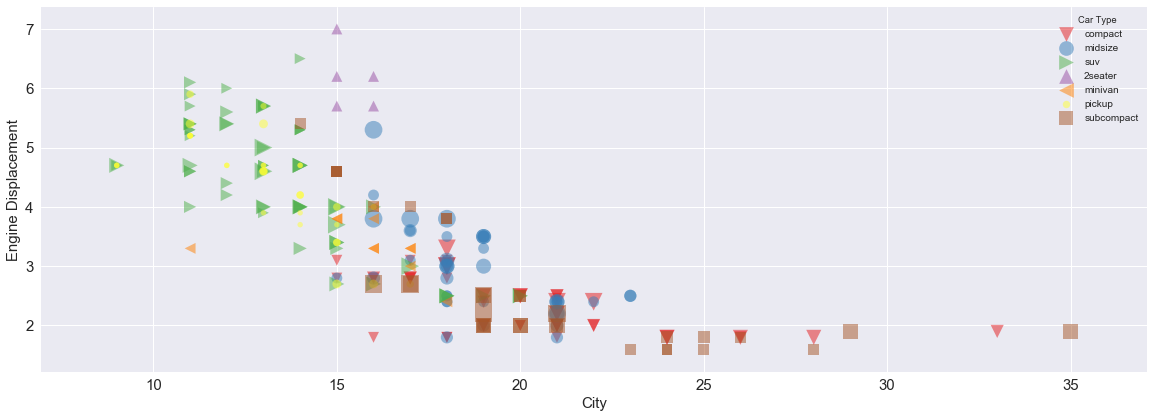

In [15]:
g = sns.lmplot('cty', 'displ',
           data=df,
           fit_reg=False,
           palette='Set1',
           markers = markers,
           hue="class",
           legend = False,
           legend_out = False,
           scatter_kws={"s": size,
                        "alpha": 0.5})

g.fig.set_size_inches(18, 6)
g.set_xlabels("City",size=15)
g.set_ylabels("Engine Displacement", size=15)
g.set_xticklabels(size=15)
g.set_yticklabels(size=15)
g.add_legend(title='Car Type')
None


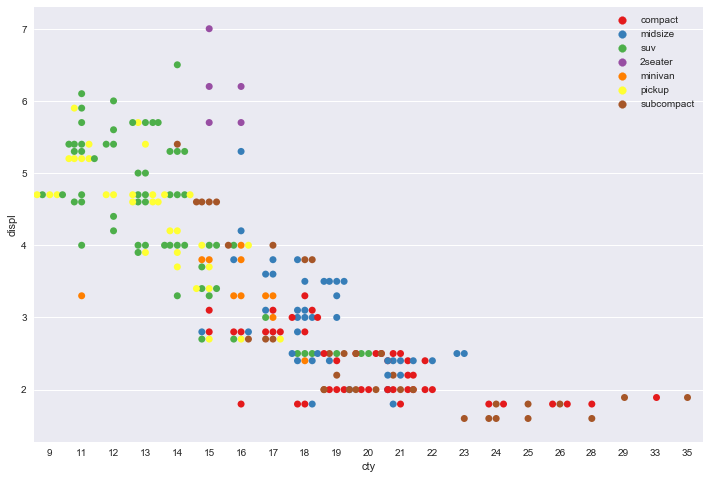

In [16]:
plt.figure(figsize=(12,8))
plot = sns.swarmplot(df.cty, df.displ, hue=class_list, size=7, palette='Set1')
None

In [17]:
df.head(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact


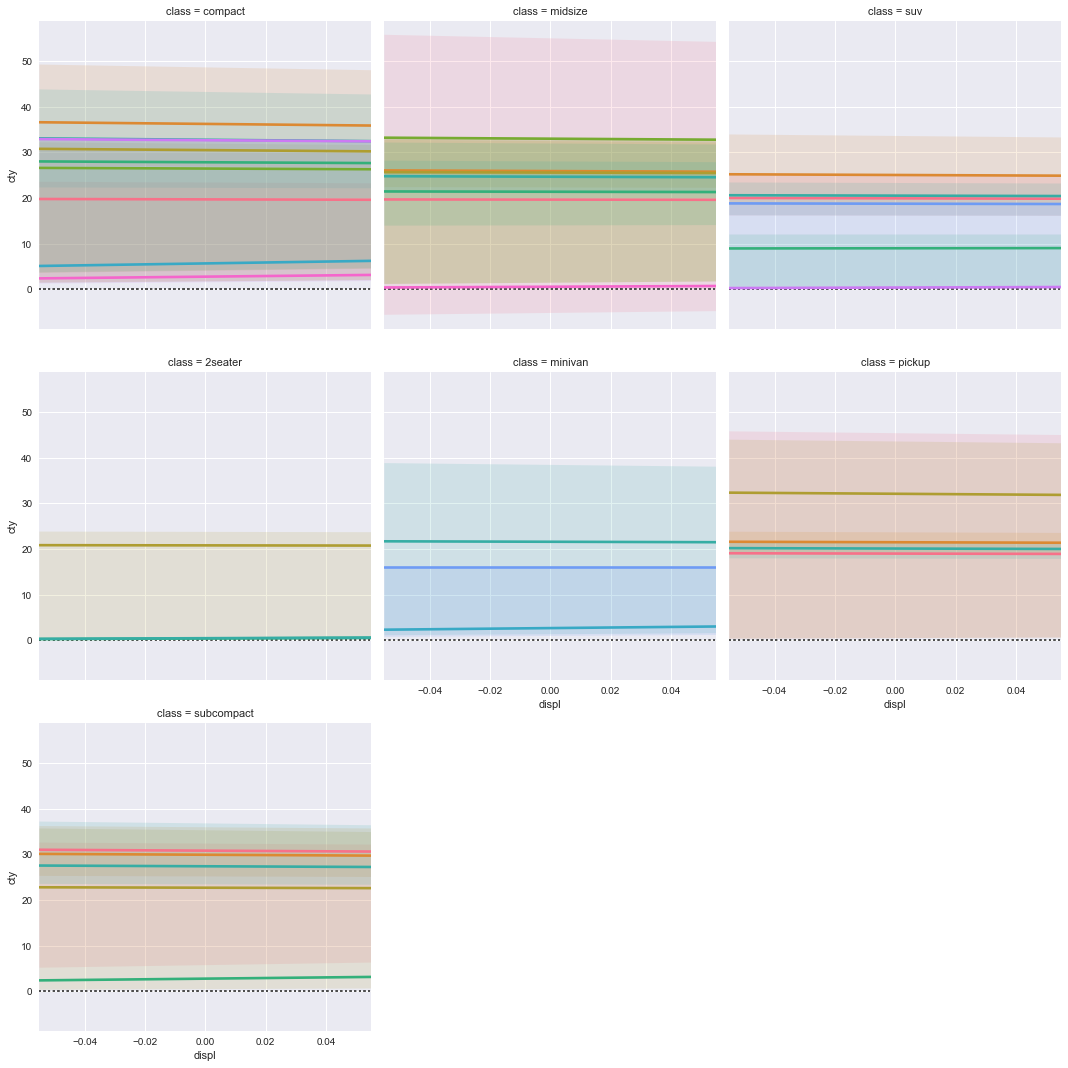

In [20]:
#Facet by class, show cty/hwy vs. displacement
#Facet by class, show cty/hwy vs. displacement, code transmission and draw regression per transmission type
grid = sns.FacetGrid(df, col="class", hue="trans", col_wrap=3, size=5)
grid.map(plt.axhline, y=0, ls=":", c=".3")
grid.map(sns.regplot, "displ", "cty", marker="o")
None